In [12]:
from anomaly_detection_class import *
from anomaly_detection_helper import train_test_split
import pickle
import seaborn as sns

In [2]:
import imp
import anomaly_detection_helper
imp.reload(anomaly_detection_helper)
from anomaly_detection_helper import *

In [3]:
import os

project_dir = os.path.realpath(os.path.join(os.getcwd(), '..','..','..','..'))
tickerdata_dir = os.path.join(project_dir, 'ORATS','byticker')
symboluniv_data_file = [os.path.join(tickerdata_dir, f) for f in os.listdir(tickerdata_dir)]
symboluniv_data_file

['D:\\jupyter\\wooji\\ORATS\\byticker\\120SymbolUniv_14_21.parquet',
 'D:\\jupyter\\wooji\\ORATS\\byticker\\180SymbolUniv_14_21.parquet',
 'D:\\jupyter\\wooji\\ORATS\\byticker\\240SymbolUniv_14_21.parquet',
 'D:\\jupyter\\wooji\\ORATS\\byticker\\349SymbolUniv_14_21.parquet',
 'D:\\jupyter\\wooji\\ORATS\\byticker\\60SymbolUniv_14_21.parquet']

In [4]:
A2 = {'variable':['volume','pcratio','impliedvol'], 
        'direction':['>','<','>'], 
        'volume_operation':'sum', 
        'window':60, 
        'log_trans':False}

B2 = {'variable':['volume','impliedvol'], 
        'direction':['>','>'], 
        'volume_operation':'sum', 
        'window':60, 
        'log_trans':False}

thresh = {'A2':[1.3, 1.2, 0.5], 
          'B2':[1.5, 0.5]}

params = {'A2':A2, 
          'B2':B2}

window = {'A2':60, 
          'B2':60}

split_date = '2019-06-01'
classes = ['A2','B2']
win_thresh = 0
test_perform = {'A2':[],'B2':[]}
symbol_arr = {'A2':[],'B2':[]}

In [11]:
#first data file
symbolUniv = pd.read_parquet(symboluniv_data_file[0])

In [45]:
for symbol in symbolUniv['underlying'].unique():
    symbolData = symbolUniv[symbolUniv['underlying']==symbol]
    for c in classes:
        try:
            _, test = train_test_split(symbolData, split_date, window[c])
        except:
            print(symbol, 'no enough data')
            continue

        ad = anomalyDetector()
        ad.compile(_type='call', expiry='next', monthly=True, moneyness='otm', params=params[c])
        ad.predict(test, win_thresh,thresh[c],verbose=False)

        stock_series = test.groupby('quotedate')['underlying_last'].first()
        baseline_winrate = winrate(stock_series, win_thresh=0, lag=5)
        ad._test_performance.loc[0,'winrate_alldate'] = baseline_winrate 
        test_perform[c].append(ad._test_performance)
        symbol_arr[c].append(symbol)
    print(symbol)
    

with open('pos_win_symbol.pkl','wb') as f:
    pickle.dump(symbol_arr,f)
with open('pos_win_test_performance.pkl','wb') as f:
    pickle.dump(test_perform,f)

CCJ
CCL
CLF
CLNE
CLX
CMCSA
COST
COTY
CRM
CRTO
CSCO
CSTM
CVS
CVX
CX
DAL
DHR
DIS
DISCA
DLTR
DM
DOW
DRI
EBAY
EDU
EPD
EQT
EXPR
F
FANG
FB
FCX
FDX
FL
FRO
FRX
ETSY
DQ
EDIT
CRBP
CRON
ET
CPRI
FSLY
CHWY
CRWD
DOYU
FPAC
DKNG
DT
CVAC
CD
CRSR
DNMR
CLOV
CHPT no enough data
CHPT no enough data
CHPT
CLII no enough data
CLII no enough data
CLII
CPNG no enough data
CPNG no enough data
CPNG
ENTX no enough data
ENTX no enough data
ENTX
COIN no enough data
COIN no enough data
COIN


In [5]:
#2nd data file
symbolUniv = pd.read_parquet(symboluniv_data_file[1])

In [6]:
with open('pos_win_symbol.pkl','rb') as f:
    symbol_arr = pickle.load(f)
with open('pos_win_test_performance.pkl','rb') as f:
    test_perform = pickle.load(f)

In [7]:
for symbol in symbolUniv['underlying'].unique():
    symbolData = symbolUniv[symbolUniv['underlying']==symbol]
    for c in classes:
        try:
            _, test = train_test_split(symbolData, split_date, window[c])
        except:
            print(symbol, 'no enough data')
            continue

        ad = anomalyDetector()
        ad.compile(_type='call', expiry='next', monthly=True, moneyness='otm', params=params[c])
        ad.predict(test, win_thresh,thresh[c],verbose=False)

        stock_series = test.groupby('quotedate')['underlying_last'].first()
        baseline_winrate = winrate(stock_series, win_thresh=0, lag=5)
        ad._test_performance.loc[0,'winrate_alldate'] = baseline_winrate 
        test_perform[c].append(ad._test_performance)
        symbol_arr[c].append(symbol)
    print(symbol)
    

with open('pos_win_symbol.pkl','wb') as f:
    pickle.dump(symbol_arr,f)
with open('pos_win_test_performance.pkl','wb') as f:
    pickle.dump(test_perform,f)

FTEK
GCI
GE
GEVO
GILD
GLW
GM
GOLD
GPK
GS
H
INTC
ITUB
IVR
JBLU
JPM
JWN
KBH
KGC
KR
KSS
LB
LLY
LPX
LUV
LVS
LZB
M
MA
MAC
GSAT
JD
GTT
HPE
IOVA
IQ
FTCH
IDEX
HEXO
IGC
JMIA
GRWG
FUV
GNUS
LAC
LMND
HEPA
LUMN
HYLN
FUBO
IMVT
LAZR
IPOF
LESL
GOEV
GMTX
FSR no enough data
FSR no enough data
FSR
GSAH no enough data
GSAH no enough data
GSAH


In [8]:
#3nd data file
symbolUniv = pd.read_parquet(symboluniv_data_file[2])

In [9]:
with open('pos_win_symbol.pkl','rb') as f:
    symbol_arr = pickle.load(f)
with open('pos_win_test_performance.pkl','rb') as f:
    test_perform = pickle.load(f)

In [10]:
for symbol in symbolUniv['underlying'].unique():
    symbolData = symbolUniv[symbolUniv['underlying']==symbol]
    for c in classes:
        try:
            _, test = train_test_split(symbolData, split_date, window[c])
        except:
            print(symbol, 'no enough data')
            continue

        ad = anomalyDetector()
        ad.compile(_type='call', expiry='next', monthly=True, moneyness='otm', params=params[c])
        ad.predict(test, win_thresh,thresh[c],verbose=False)

        stock_series = test.groupby('quotedate')['underlying_last'].first()
        baseline_winrate = winrate(stock_series, win_thresh=0, lag=5)
        ad._test_performance.loc[0,'winrate_alldate'] = baseline_winrate 
        test_perform[c].append(ad._test_performance)
        symbol_arr[c].append(symbol)
    print(symbol)
    

with open('pos_win_symbol.pkl','wb') as f:
    pickle.dump(symbol_arr,f)
with open('pos_win_test_performance.pkl','wb') as f:
    pickle.dump(test_perform,f)

MDLZ
MDT
MDU
MGM
MOS
MS
MSFT
MU
NCLH
NFLX
NKE
NKTR
NMM
NOK
NVDA
NYCB
O
OC
OPEN
ORCL
OXY
PAGP
PATH no enough data
PATH no enough data
PATH
PAYX
PBF
PBR
PENN
PFE
PG
PLUG
MOMO
MTCH
PIRS
PDD
NIO
MRNA
PINS
NET
NVST
PLYA
PTON
NKLA
OEG
MGNI
PRPL
PSTH
PLTR
MPLN
NNDM
MP
POWW
PSAC
OCGN no enough data
OCGN no enough data
OCGN
PLBY no enough data
PLBY no enough data
PLBY
PSFE no enough data
PSFE no enough data
PSFE


In [12]:
#4th data file
symbolUniv = pd.read_parquet(symboluniv_data_file[3])

In [13]:
with open('pos_win_symbol.pkl','rb') as f:
    symbol_arr = pickle.load(f)
with open('pos_win_test_performance.pkl','rb') as f:
    test_perform = pickle.load(f)

In [14]:
for symbol in symbolUniv['underlying'].unique():
    symbolData = symbolUniv[symbolUniv['underlying']==symbol]
    for c in classes:
        try:
            _, test = train_test_split(symbolData, split_date, window[c])
        except:
            print(symbol, 'no enough data')
            continue

        ad = anomalyDetector()
        ad.compile(_type='call', expiry='next', monthly=True, moneyness='otm', params=params[c])
        ad.predict(test, win_thresh,thresh[c],verbose=False)

        stock_series = test.groupby('quotedate')['underlying_last'].first()
        baseline_winrate = winrate(stock_series, win_thresh=0, lag=5)
        ad._test_performance.loc[0,'winrate_alldate'] = baseline_winrate 
        test_perform[c].append(ad._test_performance)
        symbol_arr[c].append(symbol)
    print(symbol)
    

with open('pos_win_symbol.pkl','wb') as f:
    pickle.dump(symbol_arr,f)
with open('pos_win_test_performance.pkl','wb') as f:
    pickle.dump(test_perform,f)

QCOM
QLYS
RAD
RAIL
RIG
RKT
SAVE
SLB
SOL
SPWR
STAR
STLD
T
TAL
TAP
TD
TEVA
TJX
TMUS
TSLA
TSM
TWTR
UAL
UIS
UPS
V
VALE
VFC
VIPS
VOD
VZ
WEN
WFC
WMT
X
XL
XOM
XRX
YUM
ZNGA
TSEM
SNOW
XXII
SABR
VTNR
REI
SRNE
PYPL
SHAK
TDOC
RUN
TRVN
SQ
WLTW
SPGI
ZTO
TELL
SNAP
TTD
VRAY
TRTX
SENS
VNTR
XSPA
QRTEA
TLRY
UPWK
UXIN
SONO
TME
VFF
UBER
ZM
SRAX
SCPL
WORK
XERS
REAL
SNDL
SDC
SPCE
VIAC
SAVA
WKHS
SDGR
SWBI
SOS
TIGR
UTZ
XPEV
VLDR
U
RIDE
QS
SRAC
WISH
SKLZ
SNPR
UPST
UWMC
RBLX no enough data
RBLX no enough data
RBLX
RAAS no enough data
RAAS no enough data
RAAS
VZIO no enough data
VZIO no enough data
VZIO
ZIM no enough data
ZIM no enough data
ZIM


In [5]:
#5th data file
symbolUniv = pd.read_parquet(symboluniv_data_file[4])

In [6]:
with open('pos_win_symbol.pkl','rb') as f:
    symbol_arr = pickle.load(f)
with open('pos_win_test_performance.pkl','rb') as f:
    test_perform = pickle.load(f)

In [7]:
for symbol in symbolUniv['underlying'].unique():
    symbolData = symbolUniv[symbolUniv['underlying']==symbol]
    for c in classes:
        try:
            _, test = train_test_split(symbolData, split_date, window[c])
        except:
            print(symbol, 'no enough data')
            continue

        ad = anomalyDetector()
        ad.compile(_type='call', expiry='next', monthly=True, moneyness='otm', params=params[c])
        ad.predict(test, win_thresh,thresh[c],verbose=False)

        stock_series = test.groupby('quotedate')['underlying_last'].first()
        baseline_winrate = winrate(stock_series, win_thresh=0, lag=5)
        ad._test_performance.loc[0,'winrate_alldate'] = baseline_winrate 
        test_perform[c].append(ad._test_performance)
        symbol_arr[c].append(symbol)
    print(symbol)
    

with open('pos_win_symbol.pkl','wb') as f:
    pickle.dump(symbol_arr,f)
with open('pos_win_test_performance.pkl','wb') as f:
    pickle.dump(test_perform,f)

AA
AAL
AAPL
ABBV
ABEV
ABT
ADI
AHT
AI
AKAM
ALGN
ALNY
AMAT
AMD
AMRS
AMZN
AON
APA
ARMK
ATVI
BA
BAC
BBBY
BBD
BDSI
BGS
BIDU
BIIB
BLMN
BMY
BP
C
CAT
AMC
BABA
APPS
BW
AGTC
AUPH
AYX
BB
BHC
BILI
BLNK
ACB
ATOS
AVTR
BKR
BIGC
ASO
ABNB
BNGO
BTWN
CAN
CCIV
AACQ
BBIG no enough data
BBIG no enough data
BBIG
ARVL no enough data
ARVL no enough data
ARVL


In [8]:
a2_summary = pd.concat(test_perform['A2'])
a2_summary['ticker'] = symbol_arr['A2']
a2_summary.dropna(how='any', inplace=True)
a2_summary.describe()

,winprob,outliernum,posret,negret,expret,winrate_alldate
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,0.491044,23.945455,0.088015,-0.083200,-0.000291,0.512815
std,0.136966,10.348346,0.075815,0.062079,0.043808,0.056346
min,0.111000,2.000000,0.004000,-0.505000,-0.176223,0.314000
25%,0.408500,17.000000,0.039000,-0.103500,-0.016844,0.479500
50%,0.486000,24.000000,0.062000,-0.068000,-0.002440,0.521000
75%,0.571000,30.000000,0.111500,-0.041000,0.016704,0.555500
max,0.929000,65.000000,0.517000,-0.015000,0.296544,0.638000


In [13]:
a2_summary.sort_values('winprob', ascending=False).iloc[:15]

,winprob,outliernum,posret,negret,expret,volume/pcratio/impliedvol,winrate_alldate,ticker
0,0.929,14,0.099,-0.019,0.090622,"[1.3, 1.2, 0.5]",0.546,PTON
0,0.909,11,0.101,-0.418,0.053771,"[1.3, 1.2, 0.5]",0.520,KSS
0,0.800,10,0.034,-0.032,0.020800,"[1.3, 1.2, 0.5]",0.545,TSEM
0,0.789,19,0.041,-0.027,0.026652,"[1.3, 1.2, 0.5]",0.541,BMY
0,0.788,33,0.031,-0.041,0.015736,"[1.3, 1.2, 0.5]",0.616,MSFT
0,0.769,13,0.118,-0.072,0.074110,"[1.3, 1.2, 0.5]",0.512,CRTO
0,0.769,13,0.044,-0.032,0.026444,"[1.3, 1.2, 0.5]",0.546,DRI
0,0.750,4,0.058,-0.018,0.039000,"[1.3, 1.2, 0.5]",0.399,BIGC
0,0.750,16,0.054,-0.039,0.030750,"[1.3, 1.2, 0.5]",0.483,NKTR
0,0.750,12,0.054,-0.033,0.032250,"[1.3, 1.2, 0.5]",0.571,OC


In [10]:
b2_summary = pd.concat(test_perform['B2'])
b2_summary['ticker'] = symbol_arr['B2']
b2_summary.dropna(how='any', inplace=True)
b2_summary.describe()

,winprob,outliernum,posret,negret,expret,winrate_alldate
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,0.493502,22.992674,0.086326,-0.085048,-0.001452,0.513564
std,0.137117,9.794203,0.075925,0.065664,0.047631,0.055826
min,0.077000,2.000000,0.004000,-0.654000,-0.185598,0.314000
25%,0.400000,17.000000,0.038000,-0.103000,-0.021112,0.483000
50%,0.500000,23.000000,0.062000,-0.069000,-0.002152,0.521000
75%,0.577000,28.000000,0.111000,-0.042000,0.015100,0.556000
max,0.929000,65.000000,0.517000,-0.010000,0.348000,0.638000


In [11]:
b2_summary.sort_values('winprob', ascending=False)

,winprob,outliernum,posret,negret,expret,volume/impliedvol,winrate_alldate,ticker
0,0.929,14,0.108,-0.019,0.098983,"[1.5, 0.5]",0.546,PTON
0,0.818,11,0.122,-0.093,0.082870,"[1.5, 0.5]",0.512,CRTO
0,0.808,26,0.050,-0.055,0.029840,"[1.5, 0.5]",0.595,PYPL
0,0.800,20,0.445,-0.040,0.348000,"[1.5, 0.5]",0.528,WKHS
0,0.786,14,0.095,-0.181,0.035936,"[1.5, 0.5]",0.520,KSS
...,...,...,...,...,...,...,...,...
0,0.188,16,0.099,-0.180,-0.127548,"[1.5, 0.5]",0.426,HEPA
0,0.167,6,0.013,-0.033,-0.025318,"[1.5, 0.5]",0.502,SDGR
0,0.167,18,0.038,-0.073,-0.054463,"[1.5, 0.5]",0.508,VFC
0,0.136,22,0.118,-0.127,-0.093680,"[1.5, 0.5]",0.418,GTT


In [14]:
temp = pd.concat([pd.concat(test_perform['A2'])[['winprob']], 
           pd.concat(test_perform['B2'])[['winprob']],], axis=1)
temp.columns = ['A2_winprob','B2_winprob']

<AxesSubplot:>

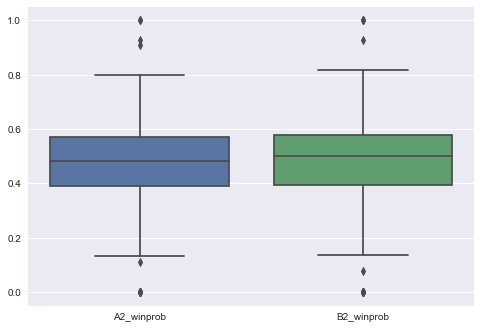

In [15]:
sns.boxplot(data=temp.dropna(how='any'))

In [16]:
tempa = a2_summary[a2_summary['winprob']>a2_summary['winrate_alldate']].sort_values('winprob',ascending=False).iloc[:15]
tempb = b2_summary[b2_summary['winprob']>b2_summary['winrate_alldate']].sort_values('winprob',ascending=False).iloc[:15]

In [17]:
set(tempa['ticker']).intersection(set(tempb['ticker']))

{'BIGC',
 'BMY',
 'CRTO',
 'KSS',
 'MSFT',
 'PTON',
 'PYPL',
 'SPWR',
 'TD',
 'TSEM',
 'WKHS'}